In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("train_data.csv")

# data info

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

In [94]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1923,0,0.5,1,7,0,46,0.5,191,1,...,767,1759,1489,10,9,3,1,1,1,1
1,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2
2,1236,0,0.9,1,2,1,57,0.1,188,1,...,517,809,1406,14,12,20,1,0,1,0
3,781,0,1.1,0,2,0,38,0.4,198,5,...,304,1674,3508,13,8,5,0,0,1,3
4,1456,1,0.5,1,7,0,7,0.4,105,5,...,823,1104,1587,6,5,20,1,0,1,1


In [95]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_sc

Nie ma żadnych braków danych, wszystkie dane są liczbowe, więc nie ma potrzeby kodowania zmiennych kategorycznych,

In [97]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1240.808750,0.490625,1.513625,0.515000,4.310000,0.52250,32.270000,0.502563,140.633750,4.542500,...,644.226250,1249.091875,2116.131250,12.220000,5.705625,10.956875,0.763125,0.505000,0.498750,1.493125
std,440.727396,0.500068,0.820189,0.499931,4.339288,0.49965,18.195165,0.286882,35.338171,2.289972,...,445.436918,431.530171,1080.711326,4.205372,4.338863,5.507742,0.425298,0.500131,0.500155,1.108815
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.00000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.675000,0.000000,1.000000,0.00000,16.000000,0.200000,109.000000,3.000000,...,280.000000,874.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1231.000000,0.000000,1.500000,1.000000,3.000000,1.00000,32.500000,0.500000,141.000000,4.000000,...,554.500000,1241.500000,2110.500000,12.000000,5.000000,11.000000,1.000000,1.000000,0.000000,1.000000
75%,1619.000000,1.000000,2.225000,1.000000,7.000000,1.00000,48.000000,0.800000,171.000000,7.000000,...,945.500000,1626.250000,3042.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.00000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


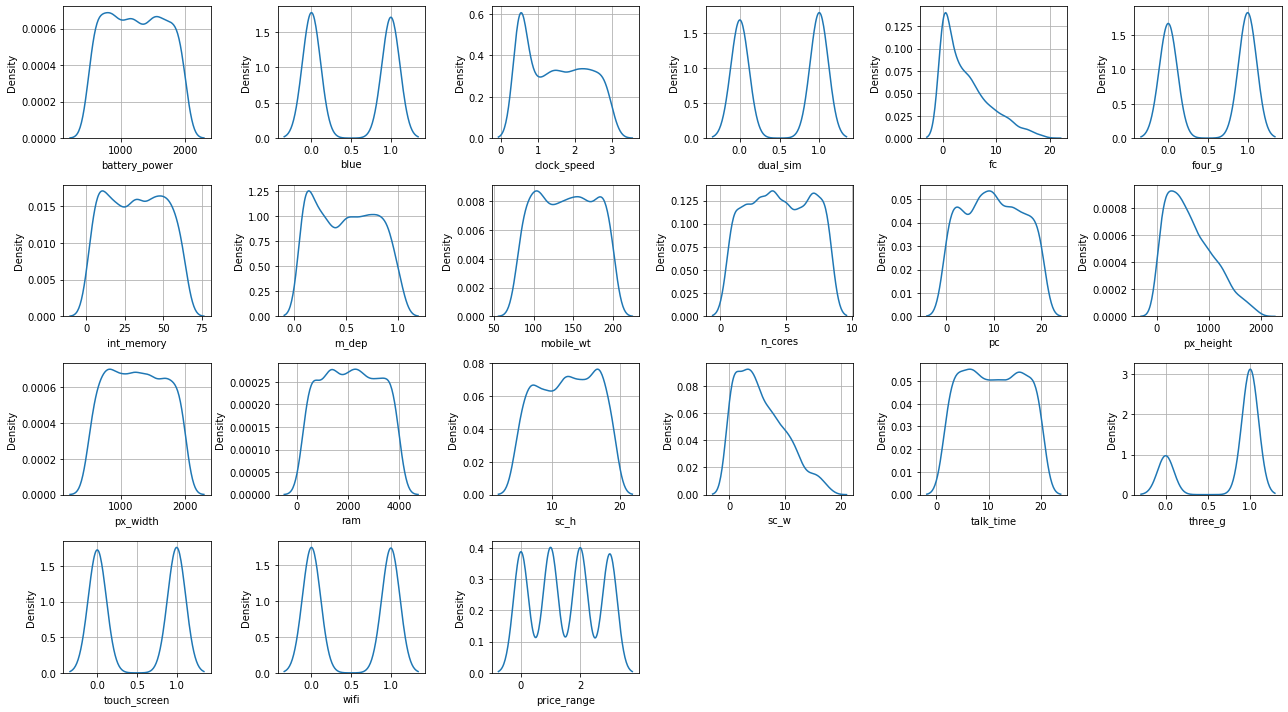

In [98]:
plt.figure(figsize=(18, 10)) 
r=4
c=6
it=1
for i in data.columns:
    plt.subplot(r,c,it)
    sns.kdeplot(data[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [3]:
y = data['price_range']
X = data.drop('price_range',axis=1)

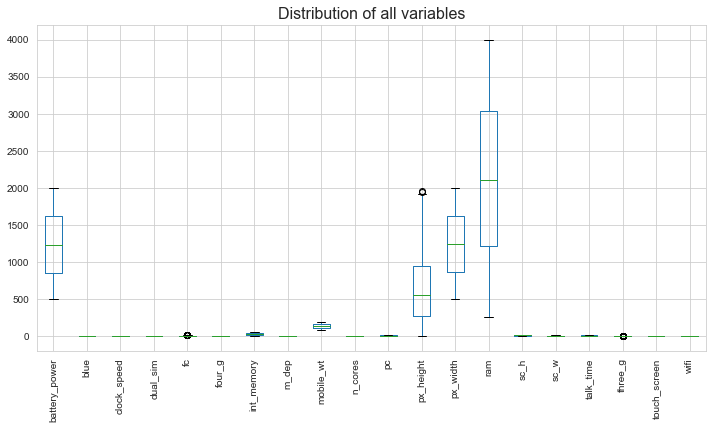

In [9]:
plt.figure(figsize=(12, 6)) 
X.boxplot()
sns.set_style("whitegrid")
plt.title('Distribution of all variables', size = 16)
plt.xticks(rotation=90)
plt.show()


In [23]:
X.nunique()

battery_power     971
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1012
px_width         1001
ram              1298
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

Widać, że przydałoby się przeskalować dane ponieważ rozstrzał liczbowy pomiędzy różnymi parametrami jest dość duży.

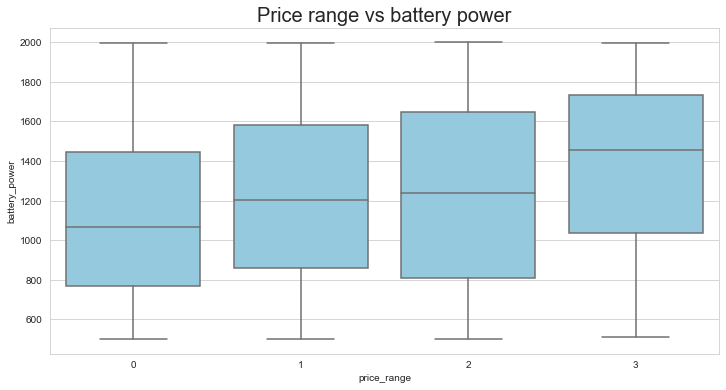

In [145]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.boxplot(x = 'price_range', y = 'battery_power', data = data, color='skyblue')
plt.title("Price range vs battery power", fontsize=20)
plt.show()

Wraz ze wzrostem pojemności batterii zwiększa się cena

Text(0, 0.5, 'RAM')

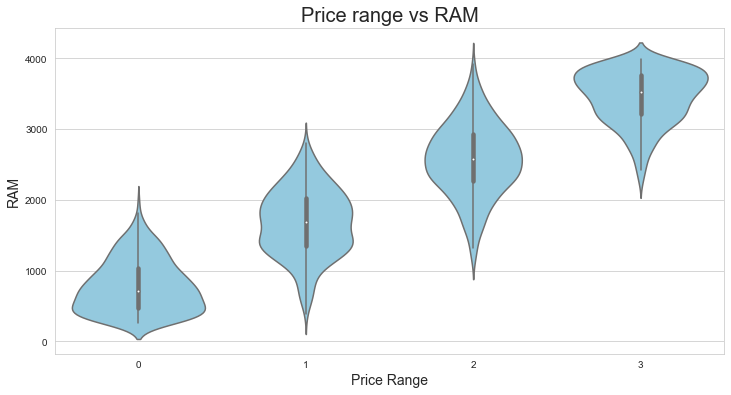

In [146]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.violinplot(x = 'price_range', y = 'ram', data = data, color = 'skyblue')
plt.title("Price range vs RAM", fontsize = 20)
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("RAM", fontsize=14)

Text(0, 0.5, 'Core Numbers')

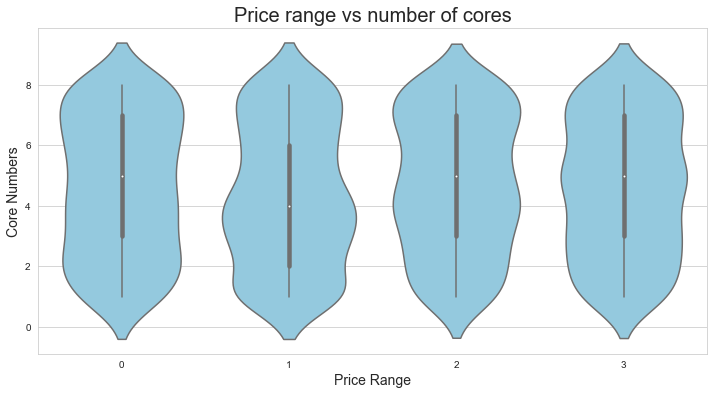

In [6]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.violinplot(x = 'price_range', y = 'n_cores', data = data, color = 'skyblue')
plt.title("Price range vs number of cores", fontsize = 20)
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("Core Numbers", fontsize=14)

Text(0, 0.5, 'Front camera resolution')

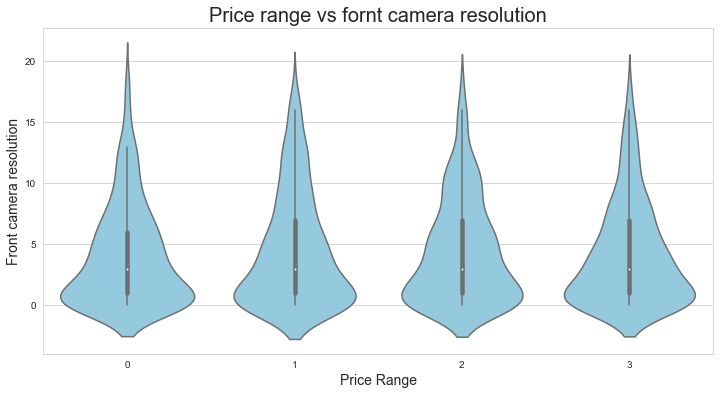

In [4]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.violinplot(x = 'price_range', y = 'fc', data = data, color = 'skyblue')
plt.title("Price range vs fornt camera resolution", fontsize = 20)
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("Front camera resolution", fontsize=14)

In [103]:
correlation_matrix = data.corr()

<AxesSubplot:>

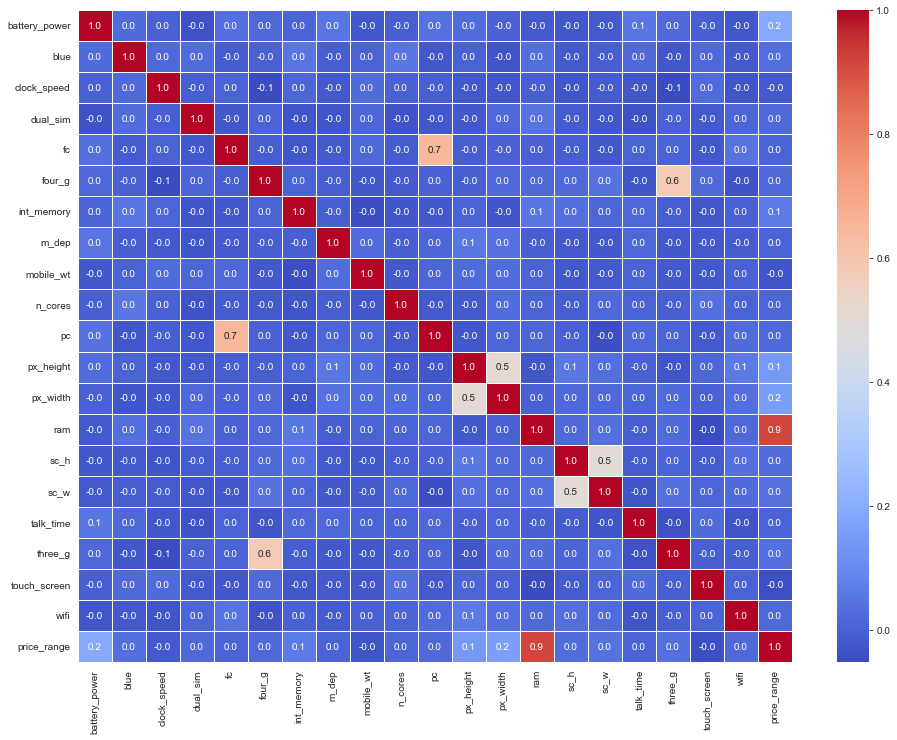

In [125]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

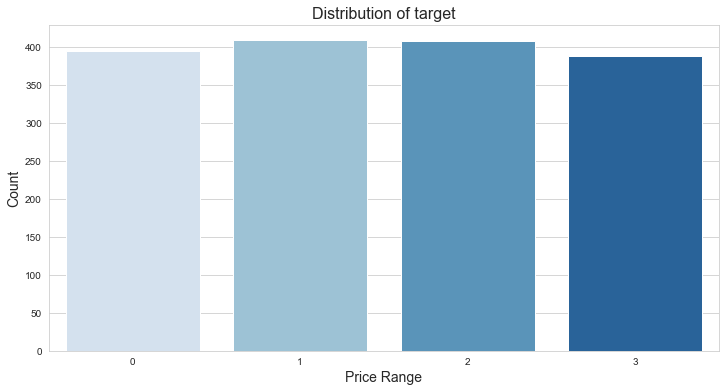

In [6]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'price_range', data = data, palette = 'Blues')
plt.title('Distribution of target', size = 16)
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig('target_distribution.jpg', dpi=300)

Text(0.5, 1.0, 'Count plot of variable blue light in different price ranges')

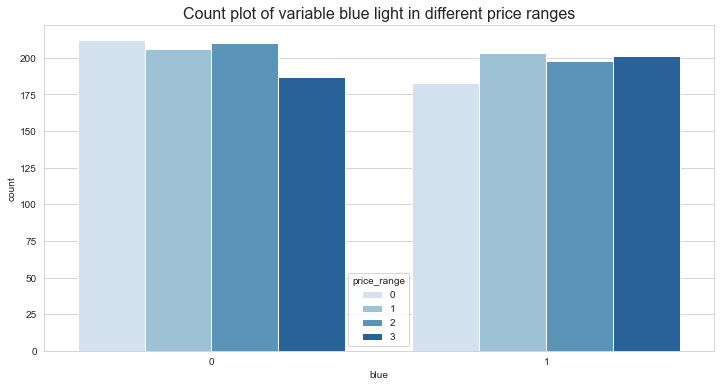

In [11]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'blue', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable blue light in different price ranges', size = 16)

Text(0.5, 1.0, 'Count plot of variable dual sim in different price ranges')

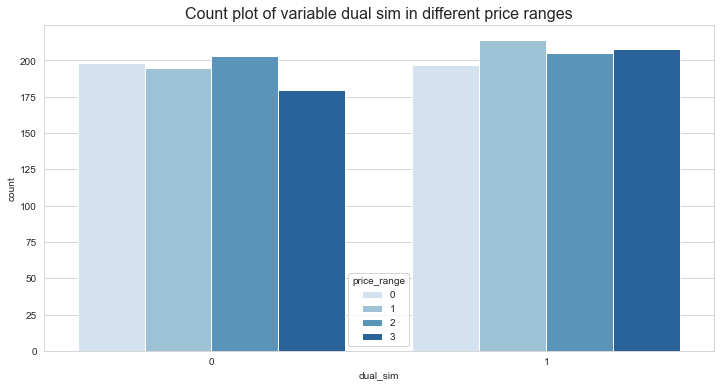

In [12]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'dual_sim', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable dual sim in different price ranges', size = 16)

Text(0.5, 1.0, 'Count plot of variable 4G in different price ranges')

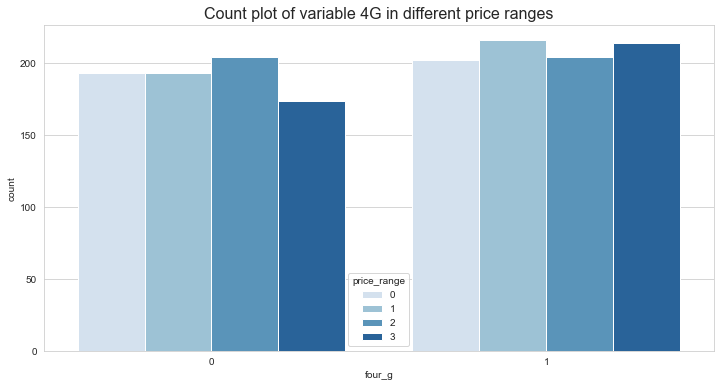

In [13]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'four_g', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable 4G in different price ranges', size = 16)

Text(0.5, 1.0, 'Count plot of variable 3G in different price ranges')

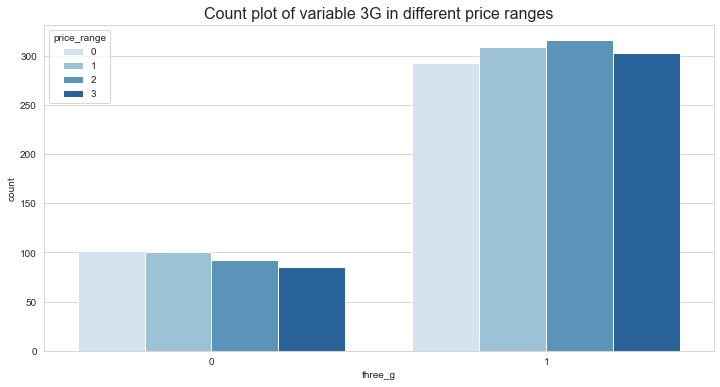

In [14]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'three_g', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable 3G in different price ranges', size = 16)

Text(0.5, 1.0, 'Count plot of variable touch screen in different price ranges')

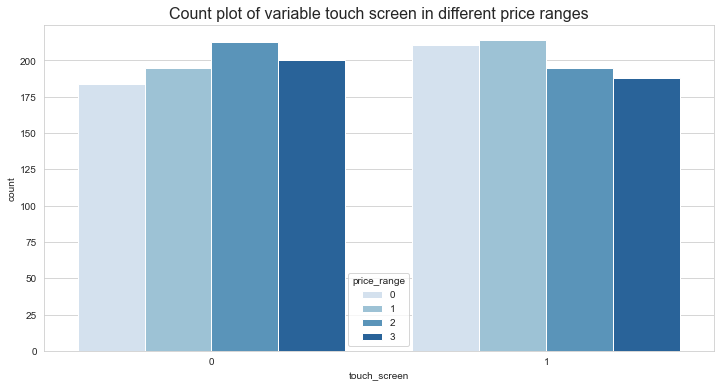

In [15]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'touch_screen', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable touch screen in different price ranges', size = 16)

Text(0.5, 1.0, 'Count plot of variable wifi in different price ranges')

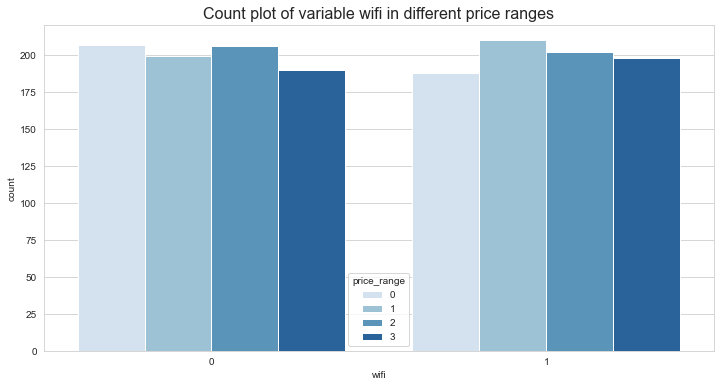

In [16]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.countplot(x = 'wifi', data = data, hue = 'price_range', palette = 'Blues')
plt.title('Count plot of variable wifi in different price ranges', size = 16)

<Figure size 864x432 with 0 Axes>

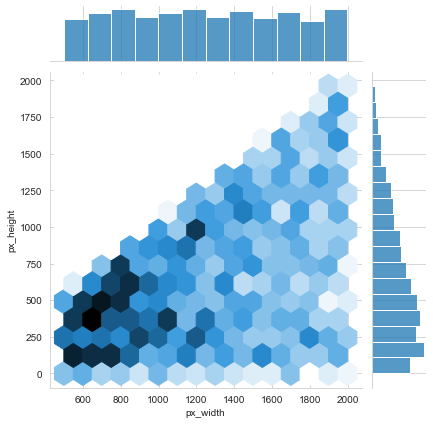

In [21]:
plt.figure(figsize=(12, 6)) 
sns.set_style("whitegrid")
sns.jointplot(x = 'px_width', y = 'px_height', data = data, kind = 'hex')


In [8]:
X = data.drop('price_range', axis = 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data.drop('price_range', axis = 1))

In [7]:
data_scaled

array([[0.9498998 , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.08817635, 1.        , 0.68      , ..., 1.        , 1.        ,
        1.        ],
       [0.49098196, 0.        , 0.16      , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.88710755, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.95257181, 0.        , 0.16      , ..., 0.        , 1.        ,
        1.        ],
       [0.08951236, 1.        , 0.04      , ..., 1.        , 0.        ,
        0.        ]])

In [43]:
X_train_scaled


MinMaxScaler()

In [47]:
scaled_data

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [10]:
scaled_df = pd.DataFrame(data=data_scaled, columns=X.columns)

In [11]:
scaled_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.949900,0.0,0.00,1.0,0.368421,0.0,0.709677,0.444444,0.925000,0.000000,0.50,0.391327,0.840454,0.329144,0.357143,0.500000,0.055556,1.0,1.0,1.0
1,0.088176,1.0,0.68,0.0,0.000000,1.0,0.758065,0.000000,0.491667,1.000000,0.05,0.269898,0.339786,0.882888,0.428571,0.055556,0.777778,1.0,1.0,1.0
2,0.490982,0.0,0.16,1.0,0.105263,1.0,0.887097,0.000000,0.900000,0.000000,0.70,0.263776,0.206275,0.306952,0.642857,0.666667,1.000000,1.0,0.0,1.0
3,0.187041,0.0,0.24,0.0,0.105263,0.0,0.580645,0.333333,0.983333,0.571429,0.35,0.155102,0.783712,0.868984,0.571429,0.444444,0.166667,0.0,0.0,1.0
4,0.637943,1.0,0.00,1.0,0.368421,0.0,0.080645,0.333333,0.208333,0.571429,0.60,0.419898,0.403204,0.355348,0.071429,0.277778,1.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.984636,1.0,0.56,1.0,0.105263,0.0,0.467742,0.888889,0.591667,0.000000,0.85,0.395408,0.738985,0.739037,0.571429,0.277778,0.944444,0.0,0.0,1.0
1596,0.058784,1.0,0.00,0.0,0.052632,1.0,0.919355,0.666667,0.550000,1.000000,0.20,0.387245,0.906542,0.027807,0.785714,0.555556,0.222222,1.0,1.0,1.0
1597,0.887108,1.0,0.00,0.0,0.000000,1.0,0.209677,0.333333,0.666667,0.571429,0.35,0.371939,0.512016,0.487166,0.785714,0.611111,0.555556,1.0,0.0,1.0
1598,0.952572,0.0,0.16,1.0,0.157895,0.0,0.145161,0.333333,0.916667,1.000000,0.60,0.250510,0.671562,0.710695,0.785714,0.611111,0.888889,0.0,1.0,1.0


In [12]:
scaled_df.to_csv('scaled_data.csv', index = False)